# Supervised Learning flow - Titanic Dataset
This project involves a supervised learning approach to predict the survival of passengers on the Titanic. Utilizing the Titanic dataset, the project explores various machine learning models to classify the passengers. The analysis includes data preprocessing, feature engineering, model training, and evaluation, providing insights into the factors that influenced survival rates.

## Part 1 - Experiments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report


In [3]:
# Loading the two datasets
test_df = pd.read_csv("titanic_test.csv")
train_df = pd.read_csv("titanic_train.csv")

In [4]:
print("Test dataset:")
test_df.head()

Test dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [5]:
print("Train dataset:")
train_df.head()

Train dataset:


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


#### EDA

In [6]:
train_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [7]:
# Checking null values and Dtypes
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [8]:
# Finding duplicated rows
print("Number of duplicated rows: " + str(train_df.duplicated().sum()))

Number of duplicated rows: 80


In [9]:
# Showing a cross tabulation to show how many survived from each port of embarkation
pd.crosstab(train_df['Embarked'],train_df['Survived'])

Survived,0,1
Embarked,,
0,333,180
1,58,76
2,40,24
3,0,1


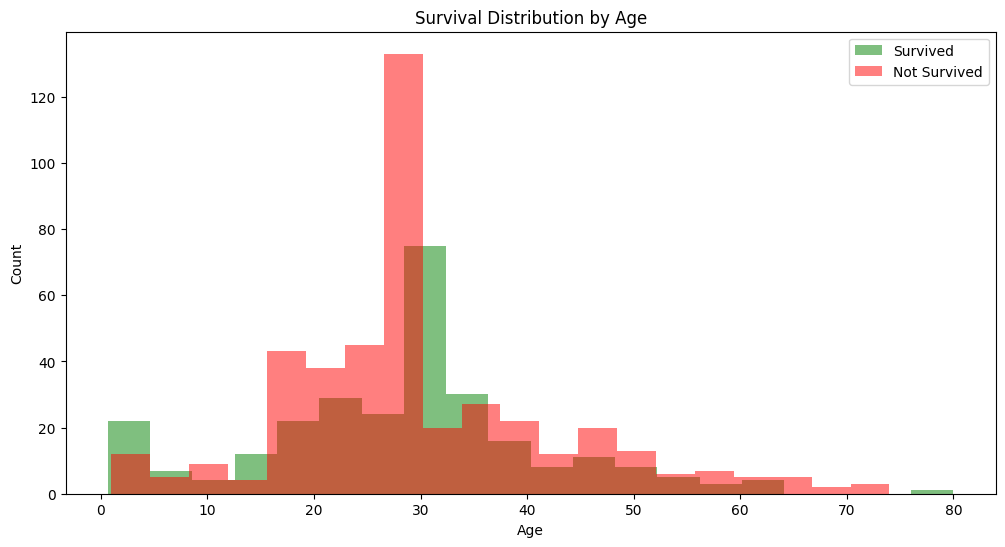

In [10]:
# Creating two sets where column "Survived" is 1 (survived) and 0 (not survived)
survived_data = train_df[train_df['Survived'] == 1]
not_survived_data = train_df[train_df['Survived'] == 0]

plt.figure(figsize=(12, 6))

# Histogram for survived
plt.hist(survived_data['Age'], bins=20, color='green', alpha=0.5, label='Survived')

# Histogram for not survived
plt.hist(not_survived_data['Age'], bins=20, color='red', alpha=0.5, label='Not Survived')

plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Survival Distribution by Age')
plt.legend()
plt.show()


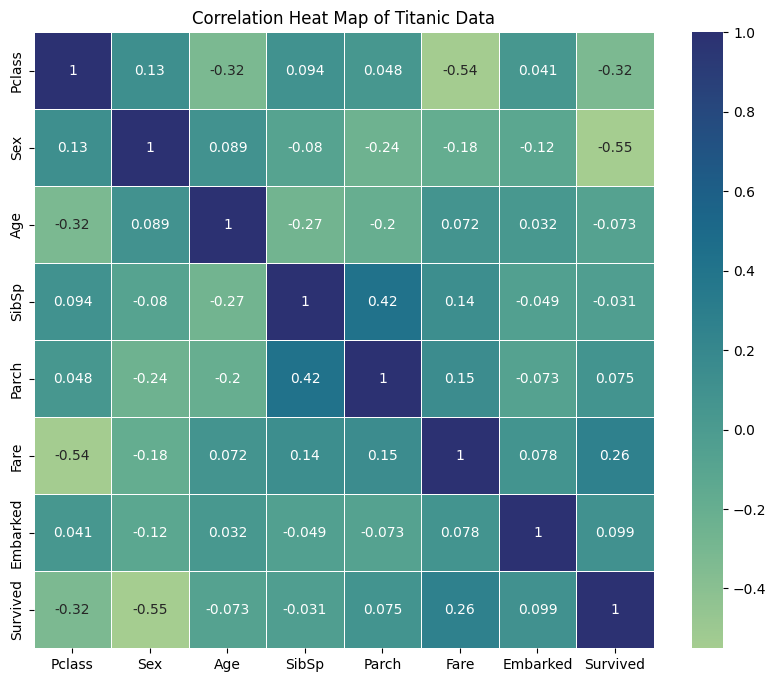

In [11]:
# Calculating and creating correlation matrix
corr = train_df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='crest', linewidths=0.5)

plt.title('Correlation Heat Map of Titanic Data')
plt.show()

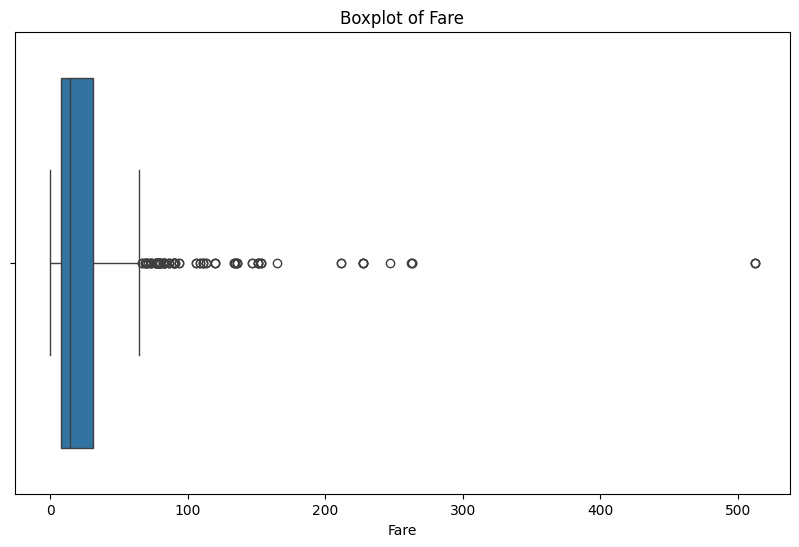

In [12]:
# Checking outliers for Fare using boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=train_df['Fare'])
plt.title('Boxplot of Fare')
plt.xlabel('Fare')
plt.show()

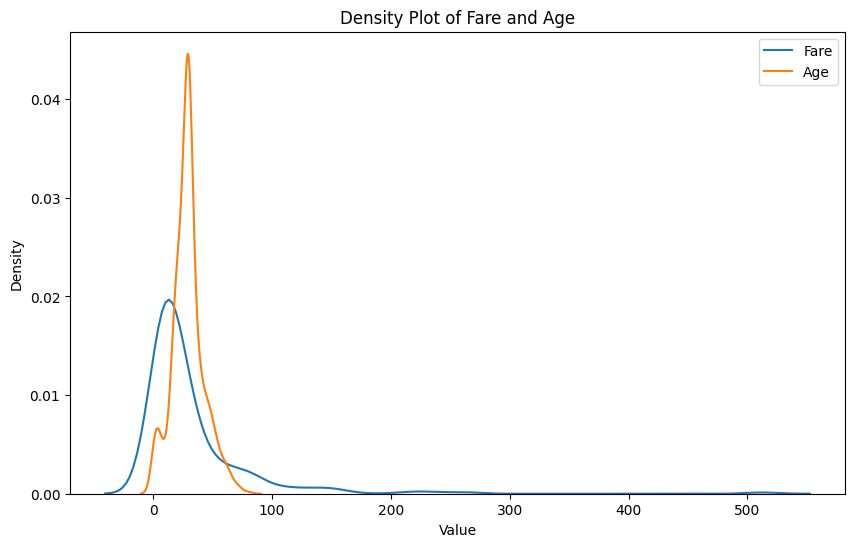

In [13]:
# Using this next plot to show the data before scaling (continuous variables)
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the KDE for Fare
sns.kdeplot(train_df['Fare'], ax=ax, label='Fare')

# Plot the KDE for Age
sns.kdeplot(train_df['Age'], ax=ax, label='Age')

ax.set_xlabel('Value')
ax.set_ylabel('Density')
ax.set_title('Density Plot of Fare and Age')
ax.legend()
plt.show()

#### Feature Engineering

In [14]:
'''From the boxplot above we identified that there are outliers that their fare was over 200.
We have decided to ignore the other outliers since they are passengers from high price classes'''

# Removing outlier
# train dataframe
train_df = train_df[train_df['Fare'] <= 200]

# train dataframe
test_df = test_df[test_df['Fare'] <= 200]


In [15]:
# Removing duplicated passengers instances

print("Number of duplicated rows before removal: " + str(train_df.duplicated().sum()))
# train dataframe
train_df.drop_duplicates(inplace=True)

# test dataframe
test_df.drop_duplicates(inplace=True)

print("Number of duplicated rows after removal: " + str(train_df.duplicated().sum()))

Number of duplicated rows before removal: 80
Number of duplicated rows after removal: 0


In [16]:
# Combining SibSp and Parch into one 'FamilySize' column

# train dataframe
train_df['SibSp'] = train_df['SibSp'] + train_df['Parch'] + 1  # +1 for the person himself
train_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
train_df.drop(columns=['Parch'], inplace=True)

#test dataframe
test_df['SibSp'] = test_df['SibSp'] + test_df['Parch'] + 1  # +1 for the person himself
test_df.rename(columns={'SibSp': 'FamilySize'}, inplace=True)
test_df.drop(columns=['Parch'], inplace=True)

In [17]:
# In the column 'Embarked' the value 3 appears only once, so replace it  

# train dataframe
most_frequent_value = train_df['Embarked'].mode()[0]
train_df['Embarked'] = train_df['Embarked'].replace(3, most_frequent_value)

# test dataframe
most_frequent_value = test_df['Embarked'].mode()[0]
test_df['Embarked'] = test_df['Embarked'].replace(3, most_frequent_value)

In [18]:
# Bin the age column

# train dataframe
train_df['Age'] = pd.cut(train_df['Age'], bins=[0, 12, 18, 60, 80, np.inf], labels=False, right=False)

# test dataframe
test_df['Age'] = pd.cut(test_df['Age'], bins=[0, 12, 18, 60, 80, np.inf], labels=False, right=False)

#### Training Evaluation

In [19]:
features_names = ['Pclass', 'Sex', 'Age', 'FamilySize', 'Fare', 'Embarked']
features = train_df[features_names].copy()
target_feature = train_df['Survived']

# Classifiers dict
classifiers = {
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Logistic Regression': LogisticRegression()
}

# Hyperparameters dict
hyperparameters = {
    'Naive Bayes': {},
    'KNN': {'clf__n_neighbors': [3, 5, 7], 'clf__weights': ['uniform', 'distance']},
    'Random Forest': {'clf__n_estimators': [50, 100], 'clf__max_depth': [None, 5, 10]},
    'Decision Tree': {'clf__max_depth': [None, 5, 10], 'clf__min_samples_split': [2, 5, 10]},
    'Logistic Regression': {'clf__C': [0.1, 1.0, 10.0], 'clf__max_iter': [50, 100, 200]}
}

# Scalers dict
scalers = {
    'StandardScaler': StandardScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# Cross-validation with grid search for each classifier and scaling method with different params
results = {}
best_estimators = {}
for classifier_name, clf in classifiers.items():
    for scaler_name, scaler in scalers.items():
        pipeline = Pipeline([('scaler', scaler), ('clf', clf)])
        clf_grid = GridSearchCV(pipeline, hyperparameters[classifier_name], cv=5, scoring='f1')
        clf_grid.fit(features, target_feature)
        results[f'{classifier_name} ({scaler_name})'] = clf_grid.best_score_
        best_estimators[f'{classifier_name} ({scaler_name})'] = clf_grid.best_estimator_

results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Best F1 Score'])

# Finding the best combination
best_combo = results_df.idxmax()['Best F1 Score']
best_estimator = best_estimators[best_combo]


print('Best F1 Score:', results_df.max()['Best F1 Score'])
print(results_df)
print('\nBest Combination:', best_combo)

Best F1 Score: 0.7486305949038117
                                      Best F1 Score
Naive Bayes (StandardScaler)               0.707236
Naive Bayes (MinMaxScaler)                 0.707236
KNN (StandardScaler)                       0.722936
KNN (MinMaxScaler)                         0.715867
Random Forest (StandardScaler)             0.732579
Random Forest (MinMaxScaler)               0.722761
Decision Tree (StandardScaler)             0.742107
Decision Tree (MinMaxScaler)               0.748631
Logistic Regression (StandardScaler)       0.706626
Logistic Regression (MinMaxScaler)         0.706875

Best Combination: Decision Tree (MinMaxScaler)


## Part 2 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

In [20]:
# Using the best estimator that was extracted in previous part to train the entire train_df
best_estimator.fit(features, target_feature)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('clf',
                 DecisionTreeClassifier(max_depth=10, min_samples_split=10))])

## Part 4 - Apply on test and show model performance estimation

In [21]:
features = test_df[features_names].copy()
target_feature = test_df['Survived']

# Predicting on the test set using the best estimator
target_feature_pred = best_estimator.predict(features)

# Evaluating model performance
accuracy = accuracy_score(target_feature, target_feature_pred)
precision = precision_score(target_feature, target_feature_pred)
recall = recall_score(target_feature, target_feature_pred)
f1 = f1_score(target_feature, target_feature_pred)
conf_matrix = confusion_matrix(target_feature, target_feature_pred)
class_report = classification_report(target_feature, target_feature_pred)

#### Showing results

Model Performance on Test Set:
Accuracy: 0.85625
Precision: 0.8541666666666666
Recall: 0.7192982456140351
F1 Score: 0.780952380952381
Confusion Matrix:
 [[96  7]
 [16 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.93      0.89       103
           1       0.85      0.72      0.78        57

    accuracy                           0.86       160
   macro avg       0.86      0.83      0.84       160
weighted avg       0.86      0.86      0.85       160



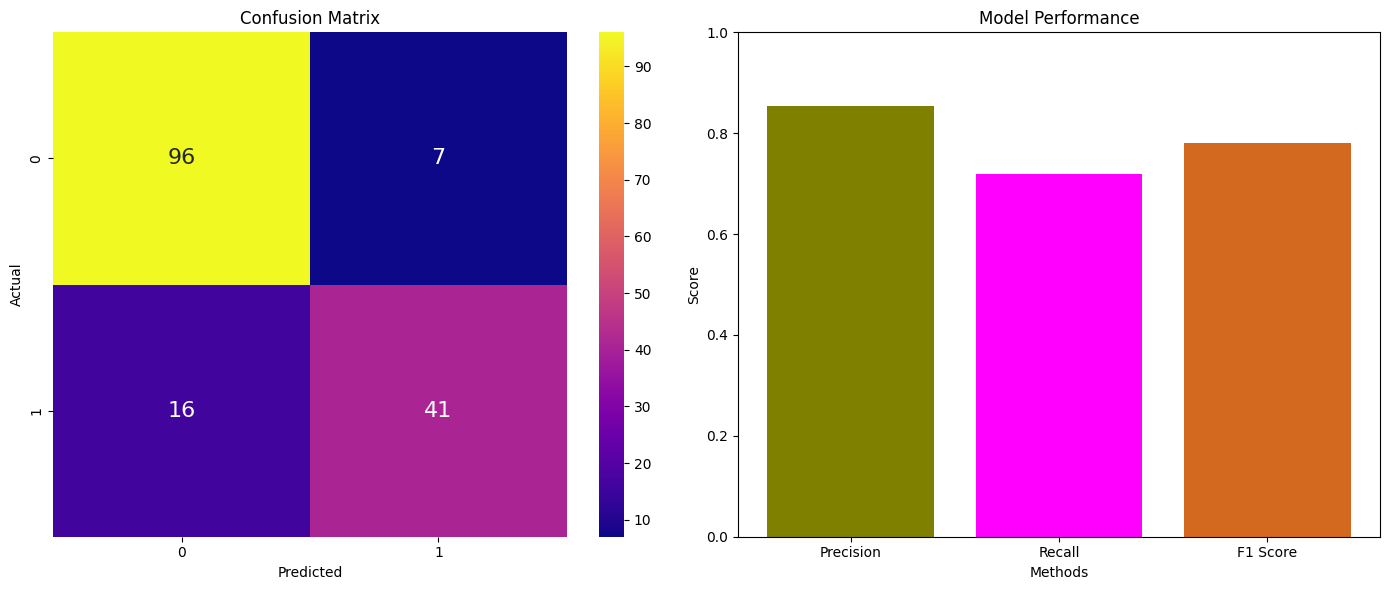

In [22]:
print('Model Performance on Test Set:')
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 Score:', f1)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='plasma', annot_kws={"size": 16}, ax=axes[0])
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].set_title('Confusion Matrix')

metrics = {'Precision': precision, 'Recall': recall, 'F1 Score': f1}
axes[1].bar(metrics.keys(), metrics.values(), color=['olive', 'magenta', 'chocolate'])
axes[1].set_xlabel('Methods')
axes[1].set_ylabel('Score')
axes[1].set_title('Model Performance')
axes[1].set_ylim(0, 1) 

plt.tight_layout()
plt.show()